# Hands-on Activity 5.1: Design and Tradeoffs Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from itertools import permutations
import warnings
warnings.filterwarnings("ignore")

In [2]:
## DEFINING HELPER FUNCTIONS FOR NORMALIZATION
def minNormalize(values):
    values = list(values)
    goal = values.pop(-1)
    normal = [9*((max(values)-x)/(max(values)-min(values)))+1 for x in values]
    normal.append(goal)
    return normal

def maxNormalize(values):
    values = list(values)
    goal = values.pop(-1)
    normal = [9*((x-min(values))/(max(values)-min(values)))+1 for x in values]
    normal.append(goal)
    return normal

def normalize(values):
    if values.iloc[-1] == 'MAX':
        normal = maxNormalize(values)
    else:
        normal = minNormalize(values)
    return normal

## DEFINING HELPER FUNCTION FOR GETTING WEIGHTED SUM
def getWeightedSum(values):
    values = list(values)
    weight = values.pop(0)
    values = [value*weight for value in values]
    values.insert(0, weight)
    return values

def getTotal(values):
    return sum(values)

## SINGLE EXECUTION

In [3]:
criteria = ['Economic (Cost)','Environmental (Size of the Model)','Safety (People)','Risk (Minutes)','Sustainability (Minutes)']
levelOfImportance = [10,30,15,20,25]
weight = [level/100 for level in levelOfImportance]
yoloV5 = [37600,14758494,20,30,350]
ssd = [40600,12115968,22,7.5,601]
fasterRCNN = [32600,10818660,17,10,833]
goal = ['MIN','MIN','MAX','MIN','MAX']


In [4]:
data = pd.DataFrame({'levelOfImportance':levelOfImportance,
                     'weight':weight,
                     'yoloV5':yoloV5,
                     'ssd':ssd,
                     'fasterRCNN':fasterRCNN
                     },
                     index = criteria)
data.index.name='criteria'
data = data.map(lambda x: float(x))
data['goal'] = goal

In [5]:
## NORMALIZING DATA
for i in range(data.shape[0]):
    data.iloc[i,2:] = normalize(data.iloc[i,2:])

In [6]:
## GETTING WEIGHTED SUM
for i in range(data.shape[0]):
    data.iloc[i,1:-1] = getWeightedSum(data.iloc[i,1:-1])


In [7]:
## GETTING totals
total=[]
for i in range(5):
    total.append(getTotal(data.iloc[:,i]))
total.append(None)
data.loc[len(data)] = total
index = [idx for idx in data.index][:-1]
index.append('total')
data = data.set_index([index])

In [8]:
data

,levelOfImportance,weight,yoloV5,ssd,fasterRCNN,goal
Economic (Cost),10.0,0.10,0.4375,0.100000,1.00,MIN
Environmental (Size of the Model),30.0,0.30,0.3000,2.110944,3.00,MIN
Safety (People),15.0,0.15,0.9600,1.500000,0.15,MAX
Risk (Minutes),20.0,0.20,0.2000,2.000000,1.80,MIN
Sustainability (Minutes),25.0,0.25,0.2500,1.419255,2.50,MAX
total,100.0,1.00,2.1475,7.130199,8.45,NaN


In [9]:
levels = permutations(levelOfImportance)
print(list(next(levels)))

[10, 30, 15, 20, 25]


## 120 EXECUTIONS

In [10]:
levels = permutations(levelOfImportance)
design1 = []
design2 = []
design3 = []
weights = []
for level in levels:
    ## DECALRING VALUES
    criteria = ['Economic (Cost)','Environmental (Size of the Model)','Safety (People)','Risk (Minutes)','Sustainability (Minutes)']
    level = list(level)
    weight = [l/100 for l in level]
    yoloV5 = [37600,14758494,20,30,350]
    ssd = [40600,12115968,22,7.5,601]
    fasterRCNN = [32600,10818660,17,10,833]
    goal = ['MIN','MIN','MAX','MIN','MAX']

    ## CREATING DATAFRAME
    data = pd.DataFrame({'levelOfImportance':level,
                        'weight':weight,
                        'yoloV5':yoloV5,
                        'ssd':ssd,
                        'fasterRCNN':fasterRCNN
                        },
                        index = criteria)
    data.index.name='criteria'
    data = data.map(lambda x: float(x))
    data['goal'] = goal

    ## NORMALIZING DATA
    for i in range(data.shape[0]):
        data.iloc[i,2:] = normalize(data.iloc[i,2:])

    ## GETTING WEIGHTED SUM
    for i in range(data.shape[0]):
        data.iloc[i,1:-1] = getWeightedSum(data.iloc[i,1:-1])

    ## GETTING totals
    total=[]
    for i in range(5):
        total.append(getTotal(data.iloc[:,i]))
    total.append(None)
    data.loc[len(data)] = total
    index = [idx for idx in data.index][:-1]
    index.append('total')
    data = data.set_index([index])
    weights.append([level,data.iloc[:-1,1].values])
    design1.append(data.iloc[-1,2])
    design2.append(data.iloc[-1,3])
    design3.append(data.iloc[-1,4])



In [11]:
## PRINTING RESULTS OF ANALYSIS
for n,weight in enumerate(weights):
    print("Permutation",n,':',weight[0])
    print("Weights",':',weight[1])
    print(" Design 1 =",design1[n])
    print(" Design 2 =",design2[n])
    print(" Design 3 =",design3[n])
    print('')

Permutation 0 : [10, 30, 15, 20, 25]
Weights : [0.1  0.3  0.15 0.2  0.25]
 Design 1 = 2.1475
 Design 2 = 7.130199028122497
 Design 3 = 8.45

Permutation 1 : [10, 30, 15, 25, 20]
Weights : [0.1  0.3  0.15 0.25 0.2 ]
 Design 1 = 2.1475
 Design 2 = 7.346348096445479
 Design 3 = 8.4

Permutation 2 : [10, 30, 20, 15, 25]
Weights : [0.1  0.3  0.2  0.15 0.25]
 Design 1 = 2.4175
 Design 2 = 7.130199028122497
 Design 3 = 8.05

Permutation 3 : [10, 30, 20, 25, 15]
Weights : [0.1  0.3  0.2  0.25 0.15]
 Design 1 = 2.4175
 Design 2 = 7.562497164768461
 Design 3 = 7.95

Permutation 4 : [10, 30, 25, 15, 20]
Weights : [0.1  0.3  0.25 0.15 0.2 ]
 Design 1 = 2.6875
 Design 2 = 7.346348096445479
 Design 3 = 7.6

Permutation 5 : [10, 30, 25, 20, 15]
Weights : [0.1  0.3  0.25 0.2  0.15]
 Design 1 = 2.6875
 Design 2 = 7.562497164768461
 Design 3 = 7.55

Permutation 6 : [10, 15, 30, 20, 25]
Weights : [0.1  0.15 0.3  0.2  0.25]
 Design 1 = 2.9575
 Design 2 = 7.574726843253796
 Design 3 = 7.1

Permutation 7 : 

Text(0.5, 1.0, 'Summary of Sensitivity Analysis')

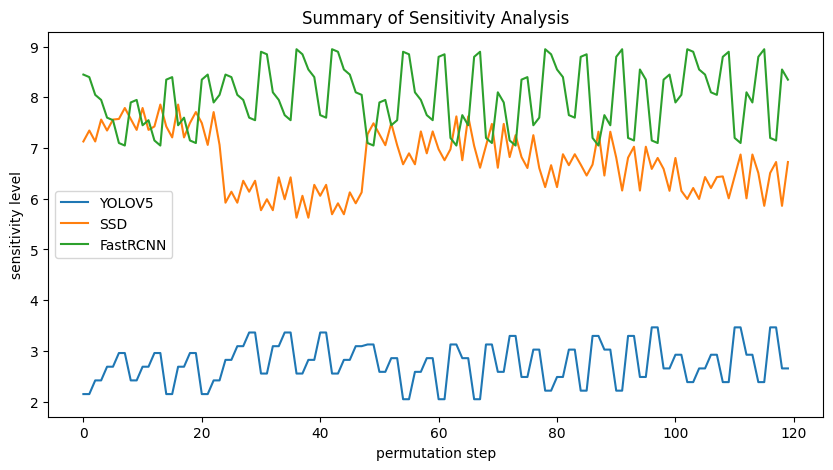

In [12]:
## PLOTTING RESULTS OF ANALYSIS
x=range(len(weights))
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=x, y=design1, ax = ax, label = 'YOLOV5')
sns.lineplot(x=x, y=design2, ax = ax, label = 'SSD')
sns.lineplot(x=x, y=design3, ax = ax, label = 'FastRCNN')
ax.set_ylabel('sensitivity level')
ax.set_xlabel('permutation step')
ax.set_title('Summary of Sensitivity Analysis')

In [14]:
## Creating radar graph

iterations = [str(i) for i in range(120)]

#design 1
data1=go.Scatterpolar(
      r=design1,
      theta=iterations,
      # fill='toself',
      name='Design 1',
)

#design 2
data2=go.Scatterpolar(
      r=design2,
      theta=iterations,
      # fill='toself',
      name='Design 2'
)

#design 3
data3 = go.Scatterpolar(
      r=design3,
      theta=iterations,
      # fill='toself',
      name='Design 3'
)

datas = [data1,data2,data3]

# #customization of chart
# fig.update_layout(
#   polar=dict(
#     radialaxis=dict(
#       visible=True,
#       range=[1, 10]
#     )),
#   showlegend=False
# )

layout = go.Layout(
        plot_bgcolor='rgba(0,0,0,0)',
        legend=dict(
            x=0,
            y=0.7,
            traceorder='normal',
            font=dict(
                size=12,),
        ),
    annotations=[
        dict(
            x=0,
            y=0.75,
            xref='paper',
            yref='paper',
            text='',
            showarrow=False
        )
    ],
    autosize=False,
    width=900,
    height=700,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data = datas, layout=layout)

fig.update_polars(radialaxis=dict(range=[0, 10]))

fig.show()